In [1]:
from hs_dataset import HSDataset
from albumentations.pytorch import ToTensorV2
import albumentations as A
IMG_DIR = '../2d_data/images/'
MASK_DIR = '../2d_data/masks/'

In [26]:
x_start = 50
x_end = 462
y_start = 50
y_end = 462 
train_transforms = A.Compose(
                                [
                                A.Crop(x_start, y_start, x_end, y_end, always_apply= True),
                                #A.CLAHE(p=1),
                                #A.GaussNoise(p=1),
                                A.Resize(height = 256, width = 256),
                                A.Rotate(limit = 30, p = 0.2), 
                                A.HorizontalFlip(p = 0.2), 
                                A.VerticalFlip(p = 0.2), 
                                A.Normalize(
                                            mean = [0.0, 0.0, 0.0],
                                            std = [1.0, 1.0, 1.0], 
                                            max_pixel_value = 255.0
                                            ),
                                ToTensorV2(), # conversión a tensor de Pytorch
                                ],
                            )

In [27]:
import cv2
import numpy as np

def dilate(image, kernel_size):
    kernel = np.ones(kernel_size, np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    return dilated_image

def erode(image, kernel_size):
    kernel = np.ones(kernel_size, np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    return eroded_image

In [28]:
dataset = HSDataset(IMG_DIR, MASK_DIR, train_transforms, 40, 350, normalized=False)


In [29]:
image, mask =  dataset.__getitem__(33)

In [30]:
import matplotlib.pyplot as plt
image = image.numpy().transpose(1, 2, 0)


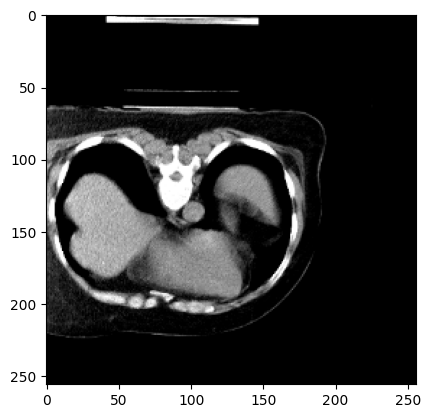

In [31]:
plt.imshow(image)

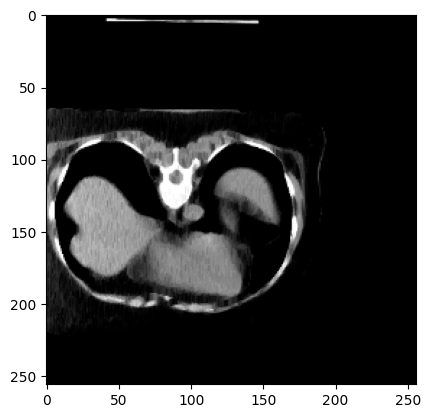

In [32]:
plt.imshow(erode(image,4))

In [1]:
id = 0
id +=1
id

1

In [29]:
import torch
from Unet import UNET
model = UNET(3,1)

torch.load(model.state_dict(torch.load('../checkpoints/Unet_my_checkpoint.pth [conflicted].tar')['state_dict']))

/home/danielcrovo/anaconda3/envs/DL/lib/python3.10/site-packages/torch/nn/modules/module.py:1802: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


AttributeError: 'collections.OrderedDict' object has no attribute 'seek'. You can only torch.load from a file that is seekable. Please pre-load the data into a buffer like io.BytesIO and try to load from it instead.

In [8]:
import pandas as pd
df = pd.read_csv('../scores/MANET_.csv')

In [9]:
df

,epoch,train_loss,train_dice,train_jaccard,dice_score,jaccard_score
0,0,3.200016,0.039759,0.020428,0.037158,0.019634
1,1,2.921519,0.065598,0.034340,0.062902,0.034481
2,2,2.846555,0.156394,0.087677,0.108417,0.063022
3,3,2.600743,0.282656,0.172786,0.142250,0.085746
4,4,2.485984,0.362717,0.232265,0.176420,0.111765
...,...,...,...,...,...,...
256,95,0.080821,0.937158,0.890050,0.861564,0.828710
257,96,0.079362,0.939575,0.894031,0.860349,0.826620
258,97,0.092229,0.938405,0.886313,0.859641,0.825389
259,98,0.115307,0.922139,0.871133,0.758947,0.722365


In [10]:
import seaborn as sns
new_df =df[60:-1].reset_index()
new_df

,index,epoch,train_loss,train_dice,train_jaccard,dice_score,jaccard_score
0,60,0,3.356456,0.038992,0.019954,0.035672,0.018527
1,61,1,3.028554,0.055432,0.028650,0.046448,0.024397
2,62,2,2.933625,0.075920,0.039747,0.062916,0.033608
3,63,3,2.871678,0.103241,0.055107,0.080106,0.043568
4,64,4,2.805723,0.141347,0.076901,0.097725,0.054073
...,...,...,...,...,...,...,...
195,255,94,0.083382,0.936606,0.888928,0.758260,0.723098
196,256,95,0.080821,0.937158,0.890050,0.861564,0.828710
197,257,96,0.079362,0.939575,0.894031,0.860349,0.826620
198,258,97,0.092229,0.938405,0.886313,0.859641,0.825389


In [11]:
new_df = new_df.drop(['index'], axis=1)

In [12]:
new_df['epoch'] = new_df.index

In [76]:
new_df = new_df.drop(100)

<AxesSubplot:xlabel='epoch', ylabel='train_dice'>

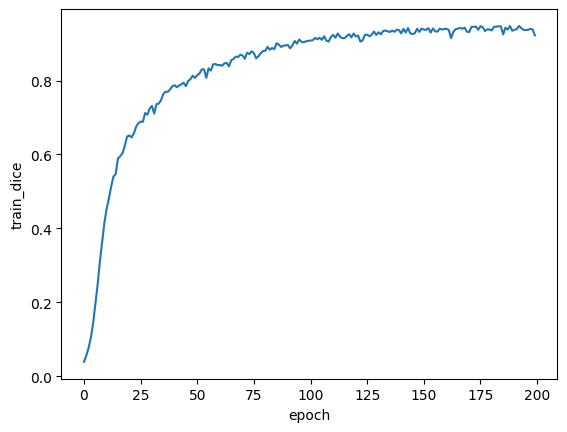

In [78]:
sns.lineplot(new_df, x='epoch', y='train_dice')

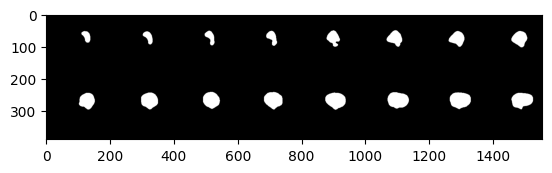

In [64]:
from  PIL  import Image
import matplotlib.pyplot as plt
import numpy as np
path_X = '/home/danielcrovo/Documents/01.Study/01.MSc/02.MSc AI/Deep Learning/Heart_Segmentation/saved_images_test/x_4.png'
path_y = '/home/danielcrovo/Documents/01.Study/01.MSc/02.MSc AI/Deep Learning/Heart_Segmentation/saved_images_test/y_4.png'
path_yh = '/home/danielcrovo/Documents/01.Study/01.MSc/02.MSc AI/Deep Learning/Heart_Segmentation/saved_images_test/y_hat_4.png'
x = Image.open(path_X).convert('RGBA')
y = Image.open(path_y).convert('RGBA')
y_hat = Image.open(path_yh).convert('RGBA')

plt.imshow(y_hat)

In [70]:
def convert_mask_to_red(img):
    img = np.array(img)   # "data" is a height x width x 4 numpy array
    red, green, blue, alpha = img.T # Temporarily unpack the bands for readability

    # Replace white with red... (leaves alpha values alone...)
    white_areas = (red == 255) & (blue == 255) & (green == 255)
    img[..., :-1][white_areas.T] = (255, 0, 0) # Transpose back needed
    im2 = Image.fromarray(img)
    return im2
def convert_mask_to_green(img):
    img = np.array(img)   # "data" is a height x width x 4 numpy array
    red, green, blue, alpha = img.T # Temporarily unpack the bands for readability

    # Replace white with red... (leaves alpha values alone...)
    white_areas = (red == 255) & (blue == 255) & (green == 255)
    img[..., :-1][white_areas.T] = (0, 255, 0) # Transpose back needed
    im2 = Image.fromarray(img)
    return im2

In [71]:
y_n = convert_mask_to_green(y)
y_hat_n = convert_mask_to_red(y_hat)

In [73]:
blended = Image.blend(x, y_hat_n, 0.2)
blended.show()